**_Seasonal Auto Regressive Integrated Moving Average_**   
_Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.Although the method can handle data with a trend, it does not support time series with a seasonal component.An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA._

**SARIMA or Seasonal ARIMA**   


	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.   

**_The notation for an SARIMA model is specified as:_**   
```SARIMA(p,d,q)(P,D,Q)m```

_An instance of the SARIMAX class can be created by providing the training data and a host of model configuration parameters._  
```
# specify training data
data = ...
# define model
model = SARIMAX(data, ...)
```

- _The implementation is called SARIMAX instead of SARIMA because the “X” addition to the method name means that the implementation also supports exogenous variables._
- _These are parallel time series variates that are not modeled directly via AR, I, or MA processes, but are made available as a weighted input to the model._
- _Exogenous variables are optional can be specified via the “exog” argument._  

### _Import Libraries and Load the data_

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [2]:
from google.colab import files
upload = files.upload()

Saving us-airlines-monthly-aircraft-miles-flown.csv to us-airlines-monthly-aircraft-miles-flown (1).csv


In [3]:
data = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [4]:
data.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [5]:
data.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [6]:
data.index = data['Month'] 

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(data['MilesMM'], model='multiplicative')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


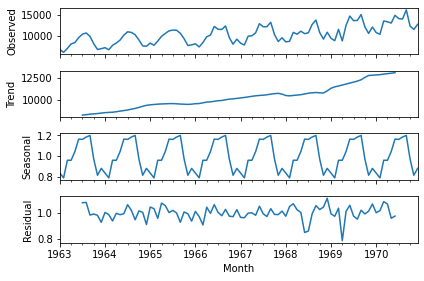

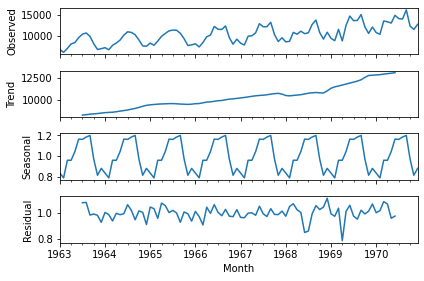

In [8]:
result_a.plot()

### _Defining the Model_

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
model = SARIMAX(data['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### _Fit the Model_

In [11]:
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
residuals = model_fit.resid

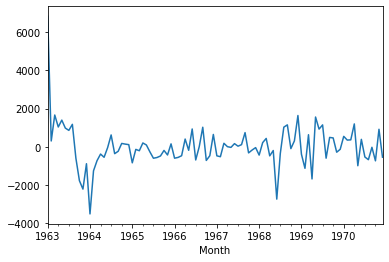

In [13]:
residuals.plot()

### _Make Prediction_

_Once fit, the model can be used to make a forecast._

_A forecast can be made by calling the forecast() or the predict() functions on the SARIMAXResults object returned from calling fit._

_The forecast() function takes a single parameter that specifies the number of out of sample time steps to forecast, or assumes a one step forecast if no arguments are provided._  
_Additionally, if exogenous variables were provided when defining the model, they too must be provided for the forecast period to the predict() function._

In [14]:
output = model_fit.forecast()

In [15]:
output

1971-01-01    11474.961639
Freq: MS, dtype: float64

In [16]:
model_fit.forecast(12)

1971-01-01    11474.961639
1971-02-01    11153.247655
1971-03-01    13668.288376
1971-04-01    12645.968371
1971-05-01    14338.976052
1971-06-01    15785.415314
1971-07-01    14978.179317
1971-08-01    15361.997494
1971-09-01    16961.899430
1971-10-01    13681.939420
1971-11-01    12426.429290
1971-12-01    13729.125998
Freq: MS, dtype: float64

In [17]:
yhat = model_fit.predict()

In [18]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.361712
1963-03-01    5420.708849
1963-04-01    7124.105650
1963-05-01    7065.564457
Freq: MS, dtype: float64

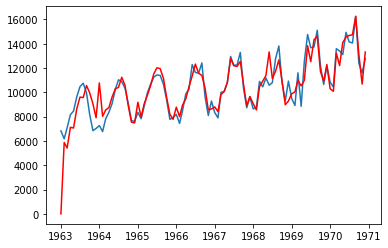

In [19]:
pyplot.plot(data['MilesMM'])
pyplot.plot(yhat, color='red')